In [23]:
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import os
import sys
import urllib.request

In [24]:
def get_request_url(url):
    client_id = "Oqd6OKJXrjMZ9tSIY7fK"
    client_secret = "iZLdCqDxFe"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    
    try:
        response = urllib.request.urlopen(request)
        if response.getcode() == 200:
            print("Request Success")
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("ERROR for URL")
        return None
    

In [25]:
def get_naver_search_one(search_text, start,display):
    end_point = "https://openapi.naver.com/v1/search/news"
    param_query= "?query=" + urllib.parse.quote(search_text)
    param_start= "&start=" + str(start)
    param_display="&display=" + str(display)
    
    url=end_point+param_query+param_start+param_display
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

In [26]:
def main():
    jsonResult = []
    start=1
    search_text='화재율'
    #화재 발생율
    #화재
    display_count=100
    
    data=get_naver_search_one(search_text, 1, display_count)
    
    while( (data!=None) and (data['display'] !=0)):
    
        for item in data['items']:
            title=item['title']
            description=item['description']
            date=item['pubDate']
            jsonResult.append({'title':title, 'description':description, 'date':date})
        
        next_start = data['start'] + data['display']
        data=get_naver_search_one(search_text, next_start, display_count)
        
    with open('news_answer.json', 'w', encoding='utf-8') as outfile:
        retJson = json.dumps(jsonResult, indent=4, ensure_ascii = False)
        outfile.write(retJson)
        
    print('naver_news.json SAVED')
            

In [27]:
def displayWordCloud(data, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = 'c:/Windows/fonts/malgun.ttf',
                        stopwords = STOPWORDS,
                        background_color = backgroundcolor,
                        width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [28]:
def main():
    jsonResult = []
    start = 1
    search_text = '화재율'
    # search_text = "화재발생율"
      # search_text = "화재발생율"
    display_count=100
    
    data=get_naver_search_one(search_text, 1, display_count)
    message=''
    while( (data!=None) and (data['display'] !=0)):
        
        for item in data['items']:
            title=item['title']
            description=item['description']
            message=message+re.sub(r'[^\w]', ' ', description)+' '
            date=item['pubDate']
            jsonResult.append({'title':title, 'description':description, 'date':date})
            
        next_start = data['start'] + data['display']
        data=get_naver_search_one(search_text, next_start, display_count)
        
    with open('news_answer.json', 'w', encoding='utf-8') as outfile:
        retJson = json.dumps(jsonResult, indent=4, ensure_ascii = False)
        
    print('naver_news.json SAVED')
    print(message[:1000])
    displayWordCloud(message, 'white', 800, 600)

Request Success
Request Success
Request Success
naver_news.json SAVED
결과적으로 16 5인치의 대미지와 41 의 높은  b 화재율  b 도 8문과 산탄이라는 기적의 조합 앞에서는 힘을 쓸 수 없습니다  어차피 이 녀석은 18인치 주포를 달고 있어도 산탄 때문에 못 맞출 녀석입니다    프리드리히 문제점 3      고폭탄 역시 41 의  b 화재율  b 을 자랑하여 불지르고 다니기에 전혀 불편함이 없으며  탄속도 철갑탄과 동일해    소련제라  b 화재율  b 은 우수한 편이나 5km에 불과한 사거리와 연사력  대미지도 기대할 수준이 아니다  혹시나 부포      b 화재율  b 이 10 로 매우 높고 탄도나 탄속도 적당해 불지르고 다니기 딱 좋다  특이한 점은 그로조보이나 오그네보이 등과 달리 주포가 360도 회전이 가능하다는 부분이다  사실 그로조보이도 같은 성능이기에 원래라면 360도     차라리  b 화재율  b 을 찍어 상대에게 끊임없이 수리반의 사용을 강요하게 만들어 침수 피해를 노리는 것이 전략이라면 전략이다  추천 스킬은 배마다 다른데  보통 어뢰와 관련된 스킬에 포인트를 몰아주면 된다  참고로     프랑스는 부포의 많은 포문과 높은 연사 능력으로 구축함의 접근을 억제하고  또한 타 국가보다 높은  b 화재율  b  12  을 바탕으로 불을 지르는 것이 포인트입니다  사족으로 일본과 미국은 127mm 부포가 주력으로 최대 27mm     사진 인천강화군소방서 인천 강화소방서는 지난 27일 강화보건소에서 보건교육실을 찾는 자가 관리 교육 대상자 35명 대상으로 부주의에 의한  b 화재율  b 을 낮추기 위한 예방교육을 실시했다  교육은 봄철을 맞아 건조기후와      b 화재율  b 은 한국이 0 14   독일 0 19   영국 0 17   다만 미국은 0 03 로 낮다  미국은 관련 배기가스 규제가 강해 EGR 사용을 줄이고 별도의 질소산화물 저감 장치를 장착했기 때문이다  BMW 차주 

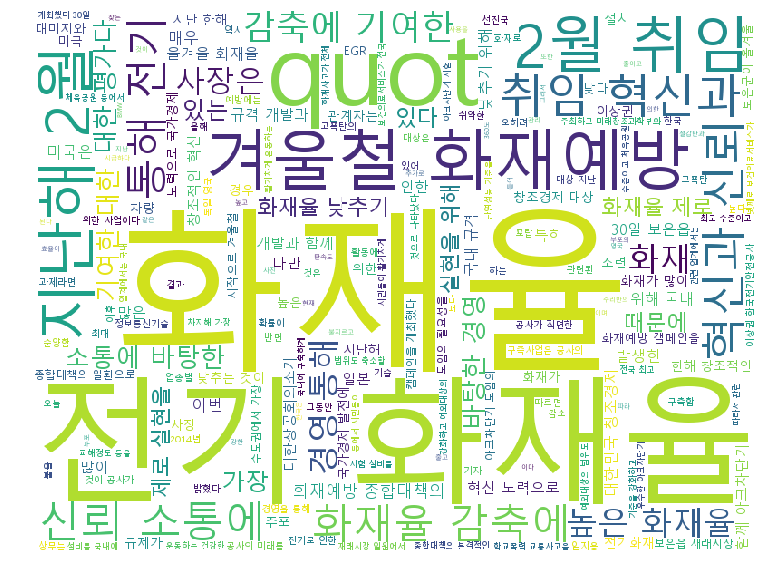

In [29]:
if __name__ == '__main__':
    main()